# Natural Language Processing Exercise (10 points)



# 1. Load the Dataset

In this exercise we will use the Reuters newswire dataset, which consists of 11,228 newswires from Reuters, labeled in 46 topics. Each newswire is a text sequence that is encoded as a list of word indexes, i.e., each word is a token represented by an integer. Reuters newswire dataset is available in the Keras built-in datasets. 


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Print the version of tf
print("TensorFlow version:{}".format(tf.__version__))
print("Keras version:{}".format(keras.__version__))

TensorFlow version:2.9.2
Keras version:2.9.0


We can load the `word_index` for the Reuters dataset, which is a dictionary consisting of words as keys and the corresponding integer indices as values. As we can see below, there are 30,979 words in the vocabulary for this dataset. 

In [3]:
word_index = keras.datasets.reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


In [4]:
len(word_index)

30979

In [5]:
# let's print 10 words and indices from the vocabulary
list(word_index.items())[:10]

[('mdbl', 10996),
 ('fawc', 16260),
 ('degussa', 12089),
 ('woods', 8803),
 ('hanging', 13796),
 ('localized', 20672),
 ('sation', 20673),
 ('chanthaburi', 20675),
 ('refunding', 10997),
 ('hermann', 8804)]

Let's load the dataset by using the first 30,000 words.

In [6]:
max_features = 30000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=max_features, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


Print the length of train_data, train_labels, test_data, and test_labels.

In [7]:
# Your Code Here
print("train_data=",len(train_data))
print("train_labels=",len(train_labels))
print("test_data=",len(test_data))
print("test_labels=",len(test_labels))

train_data= 8982
train_labels= 8982
test_data= 2246
test_labels= 2246


Note again that each sequence in the dataset is a list of integer tokens representing words. 
Print the first and second sequences in the train dataset.

In [8]:
# Your Code Here
print('First sequence', len(train_data[0]))
print(train_data[0])

First sequence 87
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [9]:
# Your Code Here
print('Second sequence', len(train_data[1]))
print(train_data[1])

Second sequence 56
[1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]


Based on the word_index, we can find the sentences that correspond to each sequence of integers, as in the next cell.

In [10]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

print([reverse_word_index.get(i-3) for i in train_data[0]])

[None, 'mcgrath', 'rentcorp', 'said', 'as', 'a', 'result', 'of', 'its', 'december', 'acquisition', 'of', 'space', 'co', 'it', 'expects', 'earnings', 'per', 'share', 'in', '1987', 'of', '1', '15', 'to', '1', '30', 'dlrs', 'per', 'share', 'up', 'from', '70', 'cts', 'in', '1986', 'the', 'company', 'said', 'pretax', 'net', 'should', 'rise', 'to', 'nine', 'to', '10', 'mln', 'dlrs', 'from', 'six', 'mln', 'dlrs', 'in', '1986', 'and', 'rental', 'operation', 'revenues', 'to', '19', 'to', '22', 'mln', 'dlrs', 'from', '12', '5', 'mln', 'dlrs', 'it', 'said', 'cash', 'flow', 'per', 'share', 'this', 'year', 'should', 'be', '2', '50', 'to', 'three', 'dlrs', 'reuter', '3']


The labels are the categories of the newswires. All 46 categories are shown below.

```
Reuters dataset labels:
{'copper': 6, 'livestock': 28, 'gold': 25, 'money-fx': 19, 'ipi': 30, 'trade': 11, 'cocoa': 0, 'iron-steel': 31, 
'reserves': 12, 'tin': 26, 'zinc': 37, 'jobs': 34, 'ship': 13, 'cotton': 14, 'alum': 23, 'strategic-metal': 27, 
'lead': 45, 'housing': 7, 'meal-feed': 22, 'gnp': 21, 'sugar': 10, 'rubber': 32, 'dlr': 40, 'veg-oil': 2, 'interest': 20,
 'crude': 16, 'coffee': 9, 'wheat': 5, 'carcass': 15, 'lei': 35, 'gas': 41, 'nat-gas': 17, 'oilseed': 24, 'orange': 38,
  'heat': 33, 'wpi': 43, 'silver': 42, 'cpi': 18, 'earn': 3, 'bop': 36, 'money-supply': 8, 'hog': 44, 'acq': 4,
   'pet-chem': 39, 'grain': 1, 'retail': 29}
```

Printed below is the category for the first sentence, which corresponds to `earn`.

In [11]:
train_labels[0]

3

Use Matplotlib to plot the histogram of the categories of newswires in train_labels.

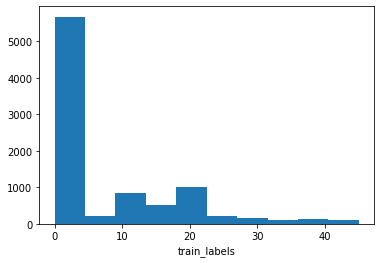

In [12]:
# Your Code Here
import matplotlib.pyplot as plt
plt.hist(train_labels)
plt.xlabel('train_labels')
plt.show()

## 2. Pad the Sequences

Create a new NumPy array called `len_sequences` which has the same length as the train_data array. Write a for-loop and assign the length of each sequence (number of tokens in each sequence) to the elements in `len_sequences`.

Afterward, use the `len_sequences` array to print the average length of train sequences, the length of the longest train sequence, and the length of the shortest train sequence. 

In [13]:
# Your Code Here
len_sequences = np.zeros(shape = (len(train_data)))
for i in range(len(train_data)):
  len_sequences[i] = len(train_data[i])
print("Average length of sequences=",np.mean(len_sequences))
print("Maximum length of sequence=",np.max(len_sequences))
print("Minimum length of sequence=",np.min(len_sequences))


Average length of sequences= 145.5398574927633
Maximum length of sequence= 2376.0
Minimum length of sequence= 13.0


Create a new integer variable `pad_length` which is approximately equal to 2 x the average length of train sequences. E.g., if the average is 48.1, set maxlen to 100, or something in that range.

Apply padding to the train and test sequences, so that they have length equal to `pad_length`. 

In [14]:
# Your Code Here
import math 
pad_length = 2 * (math.ceil( np.mean(len_sequences) / 10) * 10) #2 * avg length rounded to up to nearest 10

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = pad_sequences(train_data, maxlen = pad_length)
test_data = pad_sequences(test_data, maxlen = pad_length)

Display the first 2 padded sequences in the train dataset. 

In [15]:
# Your Code Here
print('Shape of the third padded review:', train_data.shape, '\n')
print(train_data[0:2])

Shape of the third padded review: (8982, 300) 

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0   

## 3. Create and Train a Model with Dense Layers

Define a Keras model `model_1` similar to the model in Lecture 18, which has an Embedding, Flatten, Dense, Dropout, and a final Dense layer. Use 64-dimensional vectors as outputs of the Embedding Layer, and 1,024 neurons in the first Dense layer. Make sure that the last layer outputs 46 categories, and recall that with multiclass datasets the activation of the last layer should be `softmax`.


In [16]:
# Your Code Here
embedding_dim = 64

# Create a model
model_1 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim = max_features, output_dim = embedding_dim, input_length = pad_length),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])

Display the summary of the model, and report the number of trainable parameters.

In [17]:
# Your Code Here
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           1920000   
                                                                 
 flatten (Flatten)           (None, 19200)             0         
                                                                 
 dense (Dense)               (None, 1024)              19661824  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 46)                47150     
                                                                 
Total params: 21,628,974
Trainable params: 21,628,974
Non-trainable params: 0
_________________________________________________________________


Compile the model with Adam optimizer using the default settings. If needed, review Lecture 16 to ensure that you apply the correct loss function. 

Afterward, train the model for 5 epochs, and ensure that there are no errors in fitting the model. Use a batch size of 128, and split the training data so that 20% is used for validation.

Evaluate the model on the test dataset. The expected accuracy should be between 65% and 70%.

In [18]:
# Your Code Here
model_1.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model_1.fit(train_data, train_labels, batch_size = 128, validation_split = 0.2, epochs=5)

# Evaluate on test dataset
evals_test = model_1.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

Epoch 1/5
57/57 [==============================] - 3s 15ms/step - loss: 2.1094 - accuracy: 0.4696 - val_loss: 1.6664 - val_accuracy: 0.5732
Epoch 2/5
57/57 [==============================] - 1s 11ms/step - loss: 1.2359 - accuracy: 0.7006 - val_loss: 1.3665 - val_accuracy: 0.6789
Epoch 3/5
57/57 [==============================] - 1s 10ms/step - loss: 0.6324 - accuracy: 0.8605 - val_loss: 1.2929 - val_accuracy: 0.7101
Epoch 4/5
57/57 [==============================] - 1s 10ms/step - loss: 0.3175 - accuracy: 0.9378 - val_loss: 1.3046 - val_accuracy: 0.7106
Epoch 5/5
71/71 [==============================] - 0s 3ms/step - loss: 1.3761 - accuracy: 0.6879
Classification Accuracy:  0.687889575958252


### Apply Early Stopping

Create a model named `model_2` that is similar to `model_1`, but it uses Early Stopping callback. See Lectures 16 and 21 for examples with Early Stopping callback. 

Train the model, plot the learning curves, and report the accuracy on the test dataset. 

The training time should be just a few minutes.

Training time: 0:00:05.564434


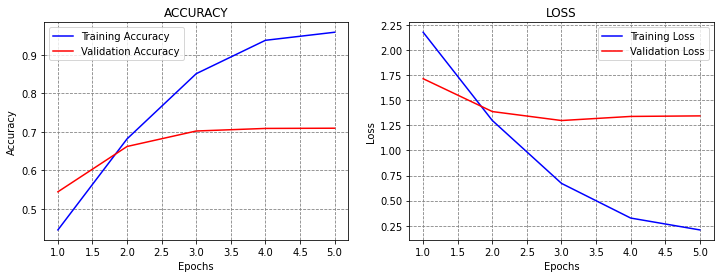

71/71 [==============================] - 0s 3ms/step - loss: 1.3461 - accuracy: 0.6972
Classification Accuracy:  0.6972395181655884


In [19]:
# Your Code Here
embedding_dim = 64

# Create a model
model_2 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim = max_features, output_dim = embedding_dim, input_length = pad_length),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])

from keras.callbacks import EarlyStopping

model_2.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

# fit model
import datetime
now = datetime.datetime.now
t = now()
history = model_2.fit(train_data, train_labels, validation_split=0.2, batch_size=128, 
                    epochs=5, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 5)])

print('Training time: %s' % (now() - t))


# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1, 1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()            
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 


evals_test = model_2.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

### Global Average Pooling Layer

Create `model_3` that replaces the `Flatten` layer with `GlobalAveragePooling1D()` layer. Fit the model, plot the learning curves, and report the accuracy on the test dataset. 

Training time: 0:00:03.027964


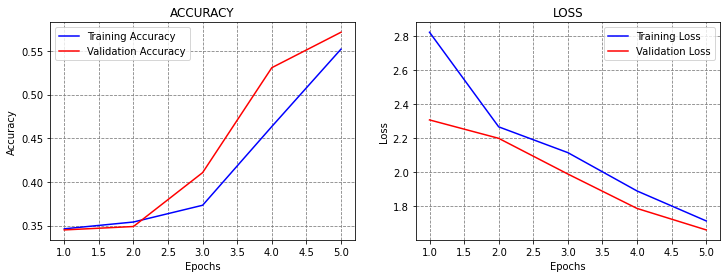

71/71 [==============================] - 0s 3ms/step - loss: 1.6978 - accuracy: 0.5637
Classification Accuracy:  0.5636687278747559


In [20]:
# Your Code Here
embedding_dim = 64

# Create a model
model_3 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim = max_features, output_dim = embedding_dim, input_length = pad_length),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])

from keras.callbacks import EarlyStopping

model_3.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

# fit model
import datetime
now = datetime.datetime.now
t = now()
history = model_3.fit(train_data, train_labels, validation_split=0.2, batch_size=128, 
                    epochs=5, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 5)])

print('Training time: %s' % (now() - t))


# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1, 1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()            
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 


evals_test = model_3.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

'''The GlobalAveragePooling layer reduces the accuracy of the model as we lose information while averaging so I have removed this layer
from further models.'''

### Different Learning Rates

Train `model_4`, `model_5`, and `model_6` using Adam optimizer with learning rates of 0.01, 0.001, and 0.0001, and discuss the impact on the performance. 

In [22]:
# Your Code Here
embedding_dim = 64

# Create a model
model_4 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim = max_features, output_dim = embedding_dim, input_length = pad_length),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
print("model_4")
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
# fit model
import datetime
now = datetime.datetime.now
t = now()
history = model_4.fit(train_data, train_labels, validation_split=0.2, batch_size=128, 
                    epochs=5, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 5)])

print('Training time: %s' % (now() - t))
evals_test = model_4.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

# Create a model
model_5 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim = max_features, output_dim = embedding_dim, input_length = pad_length),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
print("model_5")
model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
# fit model
import datetime
now = datetime.datetime.now
t = now()
history = model_5.fit(train_data, train_labels, validation_split=0.2, batch_size=128, 
                    epochs=5, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 5)])

print('Training time: %s' % (now() - t))
evals_test = model_5.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

# Create a model
model_6 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim = max_features, output_dim = embedding_dim, input_length = pad_length),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
print("model_6")
model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
# fit model
import datetime
now = datetime.datetime.now
t = now()
history = model_6.fit(train_data, train_labels, validation_split=0.2, batch_size=128, 
                    epochs=5, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 5)])

print('Training time: %s' % (now() - t))
evals_test = model_6.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

'''Learning rate controls the amount of information to be learned. 
If the learning rate is very large we will skip the optimal solution. 
If it is too small we will need too many iterations to converge to the best values.
That's what we observe with these values.'''


model_4
Training time: 0:00:03.400299
71/71 [==============================] - 0s 3ms/step - loss: 2.0969 - accuracy: 0.6527
Classification Accuracy:  0.6527159214019775
model_5
Training time: 0:00:05.571965
71/71 [==============================] - 0s 3ms/step - loss: 1.4362 - accuracy: 0.6817
Classification Accuracy:  0.6816563010215759
model_6
Training time: 0:00:03.475342
71/71 [==============================] - 0s 3ms/step - loss: 1.8115 - accuracy: 0.5476
Classification Accuracy:  0.5476402640342712


### Reduce Learning Rate on Plateau

Apply ReduceLROnPlatau callback and report the performance. If needed, check Lecture 21.

In [23]:
# Your Code Here
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Create a model
model_7 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim = max_features, output_dim = embedding_dim, input_length = pad_length),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
print("model_7")
model_7.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
# fit model
import datetime
now = datetime.datetime.now
t = now()
history = model_7.fit(train_data, train_labels, validation_split=0.2, batch_size=128, 
                    epochs=1000, verbose=0, callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)])

print('Training time: %s' % (now() - t))
evals_test = model_7.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

model_7

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 23: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 33: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 43: ReduceLROnPlateau reducing learning rate to 1e-06.
Training time: 0:10:22.346483
71/71 [==============================] - 0s 3ms/step - loss: 1.5474 - accuracy: 0.6959
Classification Accuracy:  0.6959038376808167


### Learning Rate Scheduler

Apply a Step Decay Learning Rate Scheduler, to reduce the learning rate by half every 5 epochs. 

In [24]:
# Your Code Here
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
import math

INITIAL_LEARNING_RATE = 1e-4
EPOCHS_NUM = 50

def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 5
    return INITIAL_LEARNING_RATE * math.pow(drop_rate, math.floor(epoch/epochs_drop))

# Create a model
model_8 = tf.keras.Sequential([
       tf.keras.layers.Embedding(input_dim = max_features, output_dim = embedding_dim, input_length = pad_length),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(46, activation='softmax')
])
print("model_8")
model_8.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
# fit model
import datetime
now = datetime.datetime.now
t = now()
history = model_8.fit(train_data, train_labels, validation_split=0.2, batch_size=128, 
                    epochs=EPOCHS_NUM, verbose=0, callbacks=[LearningRateScheduler(lr_step_decay, verbose=0)])

print('Training time: %s' % (now() - t))
evals_test = model_8.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])


model_8
Training time: 0:00:29.239227
71/71 [==============================] - 0s 3ms/step - loss: 1.4848 - accuracy: 0.6523
Classification Accuracy:  0.6522706747055054



Feel free to perform additional hyperparameter tuning if you wish, but it is not required. 

## 4. Create and Train a Model with Recurrent Layers

Next, create `model_9` using LSTM layers similar to the model in Lecture 18. Train the model for 5 epochs and report the performance. Expect longer training time with RNN models. 

In [25]:
# Your Code Here()
model_9 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length = pad_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])
model_9.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
# fit model
import datetime
now = datetime.datetime.now
t = now()
history = model_9.fit(train_data, train_labels, validation_split=0.2, batch_size=128, 
                    epochs=5, verbose=0)

print('Training time: %s' % (now() - t))
evals_test = model_9.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

Training time: 0:00:19.583750
71/71 [==============================] - 1s 11ms/step - loss: 1.6918 - accuracy: 0.5819
Classification Accuracy:  0.5819234251976013


### Improved Model

Use the strategy that was the most successful with the above models with Dense layers (e.g., LR scheduler or ReduceLROnPlateau), and train an LSTM model using that strategy.

Feel free to perform additional hyperparameter tuning if you wish, but it is not required. 

In [30]:
# Your Code Here
'''ReduceLROnPlatau callback is used to improve the model's accuracy.'''
model_10 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=64, input_length = pad_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])
model_10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
# fit model
import datetime
now = datetime.datetime.now
t = now()
history = model_10.fit(train_data, train_labels, validation_split=0.2, batch_size=128, 
                    epochs=1000, verbose=0, callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)])

print('Training time: %s' % (now() - t))
evals_test = model_10.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])


Epoch 21: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 31: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 41: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 51: ReduceLROnPlateau reducing learning rate to 1e-06.
Training time: 0:36:36.824017
71/71 [==============================] - 1s 14ms/step - loss: 2.6439 - accuracy: 0.6229
Classification Accuracy:  0.6228851079940796


## 5. Create and Train a Transformer Model

Create `model_10` that will implement a Transformer Network. Follow the instructions in Lecture 19. Train the transformer model from scratch, it is not required to use a pretrained model. Select the hyperparameters as you wish, but aim to obtain over 70% accuracy.

Feel free to perform additional hyperparameter tuning if you wish, but it is not required. 

In [32]:
# Your Code Here
'''Increasing the number of epochs improved the accuracy considerably.'''
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.multi_head_attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.feed_forward_net = keras.Sequential([tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),])
        self.layer_normalization1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layer_normalization2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        multi_head_att_output = self.multi_head_attention(inputs, inputs)
        multi_head_att_dropout = self.dropout1(multi_head_att_output, training=training)
        add_norm_output_1 = self.layer_normalization1(inputs + multi_head_att_dropout)
        feed_forward_output = self.feed_forward_net(add_norm_output_1)
        feed_forward_dropout = self.dropout2(feed_forward_output, training=training)
        add_norm_output_2 = self.layer_normalization2(add_norm_output_1 + feed_forward_dropout)
        return add_norm_output_2

class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_embeddings = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.positional_embeddings = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, inputs):
        maxlen = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        position_embeddings = self.positional_embeddings(positions)
        input_embeddings = self.token_embeddings(inputs)
        return input_embeddings + position_embeddings

maxlen = pad_length  # Maximum length of input sequences is 300 words
embed_dim = 64  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 64  # Dense layer size in the feed forward network inside transformer
vocab_size = 8982  # The size of the vocabulary is 20k words

# encoder
inputs = tf.keras.layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, num_heads, ff_dim)(embedding_layer)

# classifier
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(46, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

model.fit(train_data, train_labels, batch_size=128, epochs=30, validation_split=0.2)

evals_test = model.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

Epoch 1/30
57/57 [==============================] - 4s 45ms/step - loss: 4.9856 - accuracy: 0.2461 - val_loss: 2.5783 - val_accuracy: 0.3194
Epoch 2/30
57/57 [==============================] - 2s 38ms/step - loss: 2.3533 - accuracy: 0.4022 - val_loss: 2.0934 - val_accuracy: 0.4713
Epoch 3/30
57/57 [==============================] - 2s 37ms/step - loss: 1.9584 - accuracy: 0.4895 - val_loss: 1.8063 - val_accuracy: 0.5298
Epoch 4/30
57/57 [==============================] - 2s 36ms/step - loss: 1.6687 - accuracy: 0.5303 - val_loss: 1.6262 - val_accuracy: 0.5576
Epoch 5/30
57/57 [==============================] - 2s 36ms/step - loss: 1.4385 - accuracy: 0.5846 - val_loss: 1.5936 - val_accuracy: 0.5765
Epoch 6/30
57/57 [==============================] - 2s 36ms/step - loss: 1.2793 - accuracy: 0.6383 - val_loss: 1.4887 - val_accuracy: 0.6299
Epoch 7/30
57/57 [==============================] - 2s 36ms/step - loss: 1.1552 - accuracy: 0.6644 - val_loss: 1.4629 - val_accuracy: 0.6439
Epoch 8/30
57